 > Mathematicians think [the Gaussian distribution] is a law of nature and physicists are convinced it is a mathematical theorem.
 > -- Gabriel Lippman, from Grewal and Andrews p62
 
Given a mean and covariance matrix, you can generate a random population that (approximately) fits it and you can draw ellipsoids of given standard deviation. Likewise, given a set of samples presumed to be drawn from a Gaussian distribution, you can determine the mean and covariance.

Any Gaussian normal multivariate distribution of a random variable $\vec{X}$ is described by a mean vector $\bar{x}$ and a covariance matrix $\M{P}$. The mean vector is exactly what it seems. The covariance matrix is a property of a random vector variable and is defined as:

$$\M{P}=\operatorname E((\vec{X}-\bar{x})(\vec{X}-\bar{x})^T)$$

The scalar variance is the square of the standard deviation and has units of the square of the units of the scalar variable. Likewise the covariance matrix is the "square" of what you might think of as the standard deviation. 

### Constructing a sample set from a mean and covariance
The following recipe is underived here.

* Generate a sample set with the required number of vectors $N$ with the required number of components $m$, each a sample of a Gaussian normal scalar random variable with zero mean and variance 1. This will create a set of vectors with (approximately) zero vector mean and covariance equal to the $m \times m$ identity matrix. We will consider this to be a matrix $\M{X}$, where each sample is a column vector, therefore the matrix has size $m\times N$.
* Calculate the lower Cholesky decomposition of the covariance matrix $\M{A}=\operatorname{chol}(\M{P})$.
* You can check by verifying that $\M{A}\M{A}^T=\M{P}$ to sufficient precision
* Use the $\M A$ matrix to transform the set of vectors, giving a set $\M{Y}=\M{A}\M{X}$ with zero mean and the given covariance $\M{P}$.
* Add the mean vector $\bar{x}$ to each column generating a new matrix $\M{Z}$ such that $\vec{Z}_{\operatorname{column}i}=\vec{Y}_{\operatorname{column}i}+\bar{x}$. This $\M{Z}$ is the desired sample, with given mean $\bar{x}$ and covariance about that mean $\M{P}$.



In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
from numpy.linalg import cholesky

def pnoise(N,P,xbar=None):
    m=P.shape[0]
    X=nr.randn(m,N)
    A=cholesky(P)
    X=A@X
    if xbar is not None:
        X+=xbar
    return X



### Constructing uncertainty ellipsoids 
Often it is educational to draw ellipsoids of one or more "$n$-sigma" surfaces. We can use the same matrix $\M{A}$ from above. This time, the samples will not be taken at random, but will be a circle of radius $n$ and the required dimension. For instance, a 2-element vector random variable will require an $S_1$ (just a normal circle) in 2D space, a 3-element vector an $S_2$ circle (surface of a sphere) in 3D space, a 4-element vector is a $S_3$ (surface of a 4D hypersphere) in 4D space, and in general an $n$-element vector will require a set of samples of distance $n$ from the origin of $n$-space, or a unit-radius $S_{n-1}$.

Code for the 2D case follows. Higher dimensions are harder simply because it is harder to evenly space points on the surface of a sphere or hypersphere.

<IPython.core.display.Javascript object>


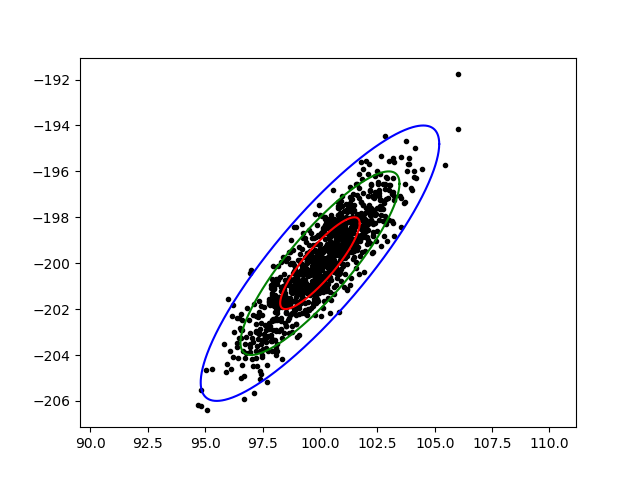

In [2]:
def pell(n,P,xbar=None):
    q=np.arange(0,2*np.pi,0.01)
    c=np.cos(q)
    s=np.sin(q)
    X=np.array([c,s])*n 
    A=cholesky(P)
    X=A @ X
    if xbar is not None:
        X+=xbar
    return X

P=np.array([[3,3],[3,4]])
xbar=np.array([[100],[-200]])
x=pnoise(1000,P,xbar)
e1=pell(1,P,xbar)
e2=pell(2,P,xbar)
e3=pell(3,P,xbar)
plt.figure("Covariance")
plt.plot(x [0,:],x [1,:],'k.')
plt.plot(e1[0,:],e1[1,:],'r-')
plt.plot(e2[0,:],e2[1,:],'g-')
plt.plot(e3[0,:],e3[1,:],'b-')
plt.axis('equal')
plt.show()

### Calculating covariance given a set of samples
The mean is easy, it's just the total of all the vectors divided by the number of vectors

The covariance is calculated as:

$$\M{P} = \frac{1}{m-1}\sum_{i=1}^m (\vec{x}_i-\bar{x})(\vec{x}_i-\bar{x})^T$$

We are using $\frac{1}{N-1}$ for the same reason we use it in a sample standard deviation -- there is one less degree of freedom due to the fact that we have to calculate the mean from the samples as well as the standard deviation.

Alternatively, arranging the observation vectors as the columns of a matrix, so that

$$\M{X} = \begin{bmatrix}\vec{x}_1 & \vec{x}_2 & \dots & \vec{x}_N \end{bmatrix}$$

which is a matrix of $m$ rows and $N$ columns. Then, the sample covariance matrix can be computed as

$$\M{P} = \frac{1}{N-1}\left( \M{F} - \bar{x}\vec{1}^T \right)\left( \M{F} - \bar{x}\vec{1}^T\right)^T$$

where $\vec{1}$ is a column vector with all components 1. This is used to create an $m \times N$ matrix where every column vector is $\bar{x}$. In code we can say:

In [3]:
def pcalc(X):
    xbar=np.mean(X,1).reshape(-1,1)
    Xac=X - xbar
    N=Xac.shape[1]
    P=(Xac @ Xac.T)/(N-1)
    return (xbar,P)

print(pcalc(x))
    

(array([[ 100.02811999],
       [-199.99264972]]), array([[2.98594305, 3.06610813],
       [3.06610813, 4.10836656]]))
